<a href="https://colab.research.google.com/github/Sreekuttanls/HHL-algorithm/blob/main/HHL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install qutip

     |████████████████████████████████| 14.6 MB 4.6 MB/s 


This code is for matrix inversion of a simple linear algebra problem.
Ax=b  A=[[2 0],[0,2]], b=[2 2]
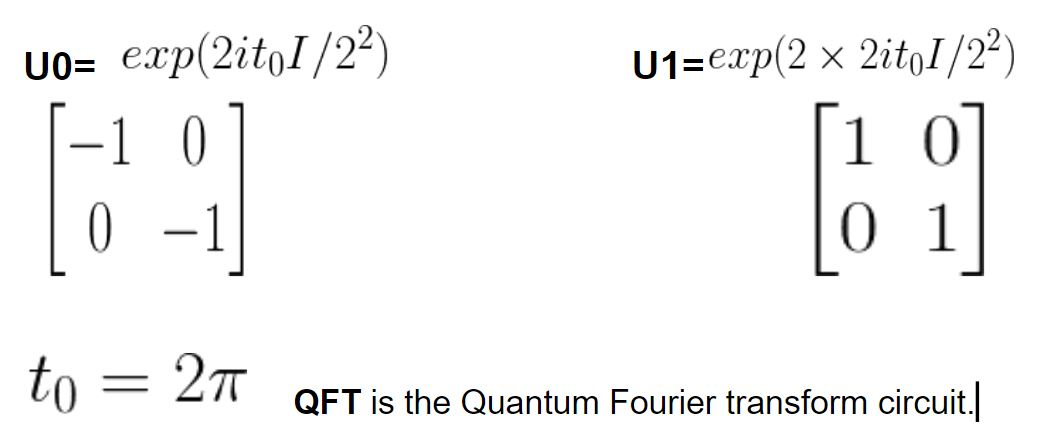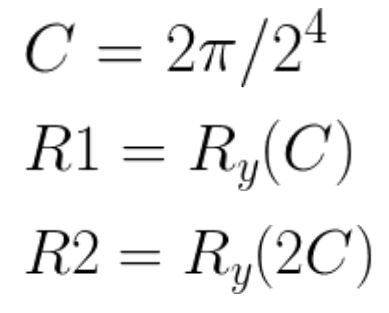




The circuit daigram 
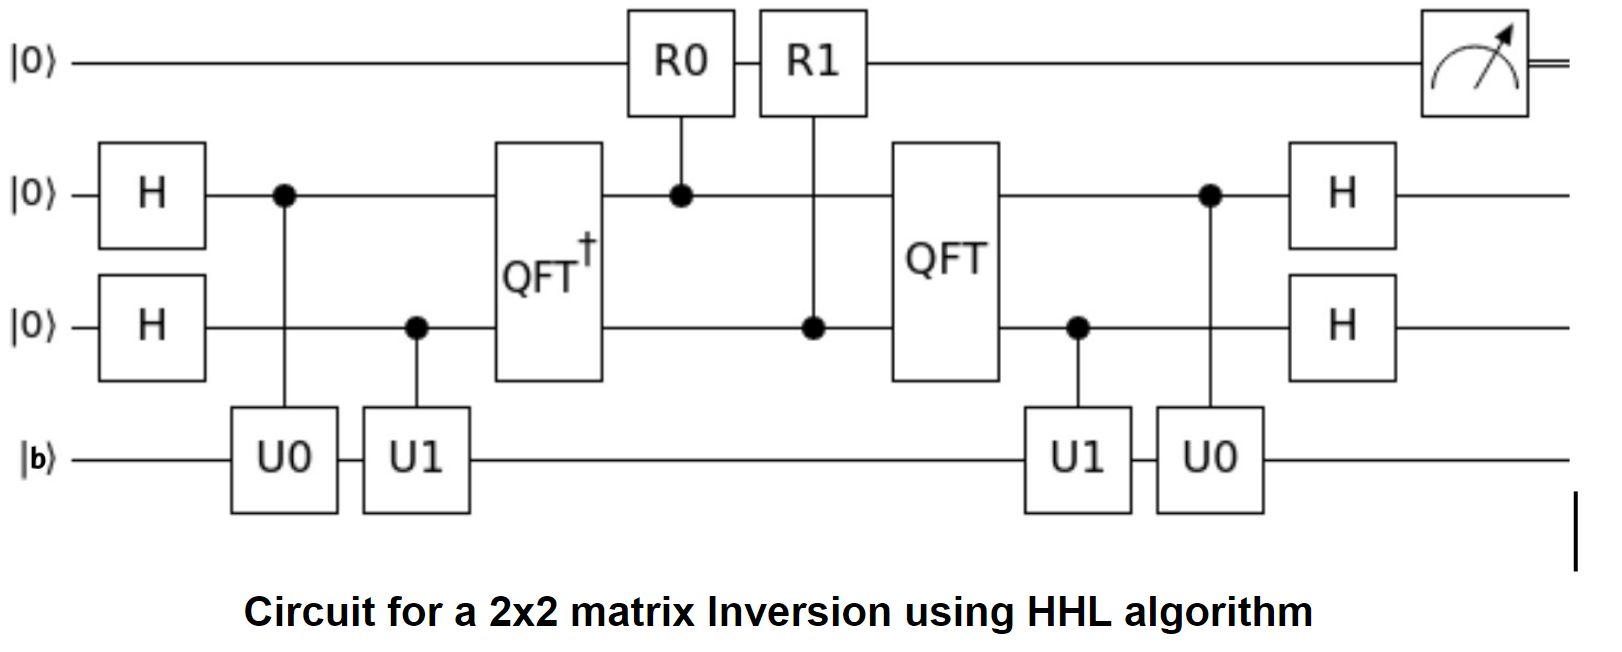

In [ ]:

from qutip import *
from qutip.qip.circuit import QubitCircuit, Gate
from qutip.qip.operations import gate_sequence_product
import math
import numpy as n

s=basis(2,0)
j2=basis(2,0)
j1=basis(2,0)
b=2*basis(2,0)+3*basis(2,1)
i=tensor(s,j1,j2,b)
#creating custom gates
def cu0():
    mat=n.zeros((4,4),dtype=n.complex)
    mat[0,0]=mat[1,1]=1
    mat[2,2]=mat[3,3]=-1
    return Qobj(mat, dims=[[2,2],[2,2]])
def cu1():
    mat=n.zeros((4,4),dtype=n.complex)
    mat[0,0]=mat[1,1]=1
    mat[2,2]=mat[3,3]=1
    return Qobj(mat, dims=[[2,2],[2,2]])
def pgate():
    mat=n.zeros((4,4),dtype=n.complex)
    mat[0,0]=mat[1,1]=mat[2, 2]=1
    mat[3,3]=-1.j
    return Qobj(mat, dims=[[2,2],[2,2]])
def pgat():
    mat=n.zeros((4,4),dtype=n.complex)
    mat[0,0]=mat[1,1]=mat[2, 2]=1
    mat[3,3]=1.j
    return Qobj(mat, dims=[[2,2],[2,2]])
q=QubitCircuit(4)
#initial step
q.add_gate("SNOT",1)
q.add_gate("SNOT",2)
q.user_gates = {"CU0": cu0,"CU1": cu1,"S":pgate,"S1":pgat}
#phase estimation controlled u
q.add_gate("CU0",[1,3])
q.add_gate("CU1",[2,3])
#qft
q.add_gate("SNOT",2)
q.add_gate("S", [2])
q.add_gate("SNOT",1)
#RY rotations
q.add_gate("CRY",0,1, n.pi/8)
q.add_gate("CRY",0,2, n.pi/4)
#Uncomputing
#QFT
q.add_gate("SNOT",1)
q.add_gate("S1",[2,1])
q.add_gate("SNOT",2)
#dephasing
q.add_gate("CU1",[2,3])
q.add_gate("CU0",[1,3])
q.add_gate("SNOT",1)
q.add_gate("SNOT",2)

e=q.propagators()
u=gate_sequence_product(e)
print(u*i)


Quantum object: dims = [[2, 2, 2, 2], [1, 1, 1, 1]], shape = (16, 1), type = ket
Qobj data =
[[1.96157056]
 [2.94235584]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.39018064]
 [0.58527097]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]]
